# Analyze Decision Tree Model and used case IBM HR Attrition Data 
Lets look into decision tree model now. First we will import the library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

Now we will create decision tree classifer model as clf and lets try learn the simple data and use the model to predict something

In [3]:
clf = DecisionTreeClassifier()

In [4]:
X = [[0, 0], [1, 2]]
y = [0, 1]

In [5]:
clf = clf.fit(X,y)

Now we will try to predict model with array value of [2, 2]

In [10]:
print("Predict result : \t{}".format(clf.predict([[2, 2]])))

Predict result : 	[1]


The model predict that the result is one. We can print the probability too. The proba is in the next code. And you can see that the proba has 100% chance that the result is the second value in array so its 1

In [12]:
print(clf.predict_proba([[2, 2]]))

[[0. 1.]]


Lets using some data now. We will import Iris Dataset

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()

In [15]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
X = iris.data[:,2:]

In [16]:
y = iris.target

In [18]:
clf = DecisionTreeClassifier()
clf = clf.fit(X,y)

Now lets visualize boundary in the decision tree model

In [28]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
col = ['petal_length', 'petal_width']
X = df[col]

In [32]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [33]:
clf = DecisionTreeClassifier()
clf = clf.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


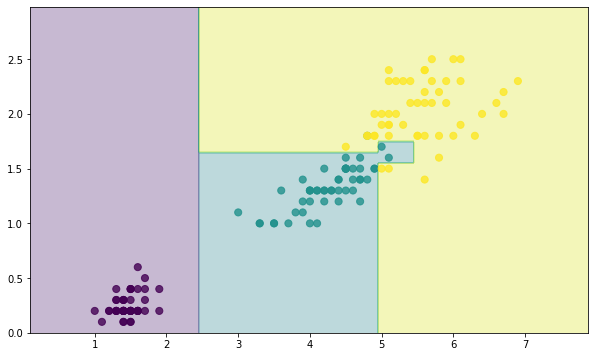

In [34]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize = (10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.3)
plt.scatter(X['petal_length'], X['petal_width'], c = y, s = 50, alpha = 0.8)
plt.show()

You can see that the boundary between each label. And somehow the model is a bit overfitting as there is an area in top right of green area. Maybe we can try using Decision Tree Regression for better visualize when choosing parameter in decision tree model.

In [101]:
def gini(p):
  return (p)*(1-p)+(1-p)*(1-(1-p))
def entropy(p):
  return -p*np.log2(p)-(1-p)*np.log2(1-p)
def error(p):
  return 1-np.max([p,1-p])

In [102]:
x = np.arange(0, 1, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

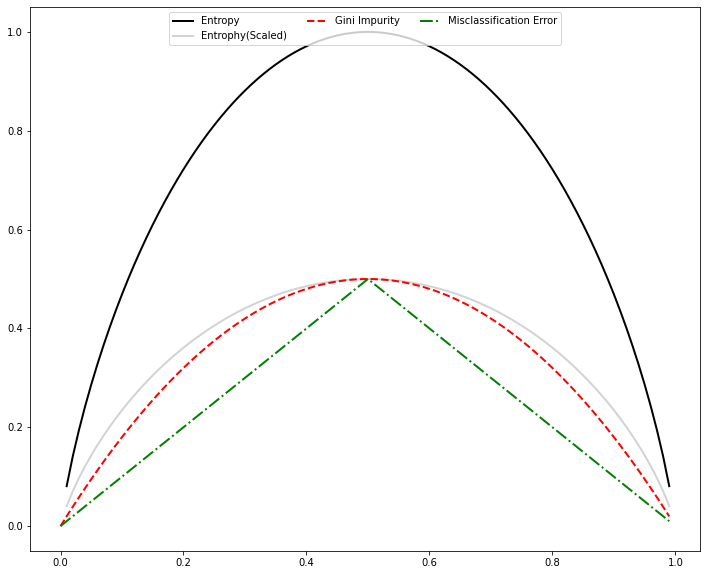

In [108]:
fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111)
for i, lab, ls, c in zip([ent, sc_ent, gini(x), err],
                      ['Entropy', 'Entrophy(Scaled)',
                       'Gini Impurity', 'Misclassification Error'],
                       ['-','-','--','-.'],
                       ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label = lab, linestyle = ls, lw = 2, color = c)

ax.legend(loc='upper center', ncol = 3, fancybox = True, shadow = False)
plt.show()

Lets try decision tree regression

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80,1), axis = 0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [51]:
rge_1 = DecisionTreeRegressor(max_depth = 2)
rge_2 = DecisionTreeRegressor(max_depth = 5)
rge_1.fit(X,y)
rge_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [52]:
X_test = np.arange(0, 5, 0.01)[:,np.newaxis]
y_1 = rge_1.predict(X_test)
y_2 = rge_2.predict(X_test)

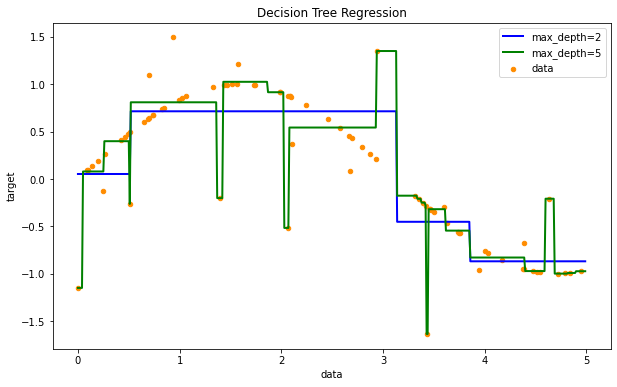

In [54]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=20, c='darkorange',label='data')
plt.plot(X_test, y_1, color='blue', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2, color='green', label='max_depth=5', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

Now from the figure above you can see that max_depth 2 is a bit underfitting. But the max_depth 5 is overfitting as the line follow the outlier data. We can add hyperparameter to tune the model. In this example we put min_sample_leaf of 10

In [57]:
rge_1 = DecisionTreeRegressor(max_depth = 2)
rge_2 = DecisionTreeRegressor(max_depth = 5, min_samples_leaf=10)
rge_1.fit(X,y)
rge_2.fit(X,y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [58]:
X_test = np.arange(0, 5, 0.01)[:,np.newaxis]
y_1 = rge_1.predict(X_test)
y_2 = rge_2.predict(X_test)

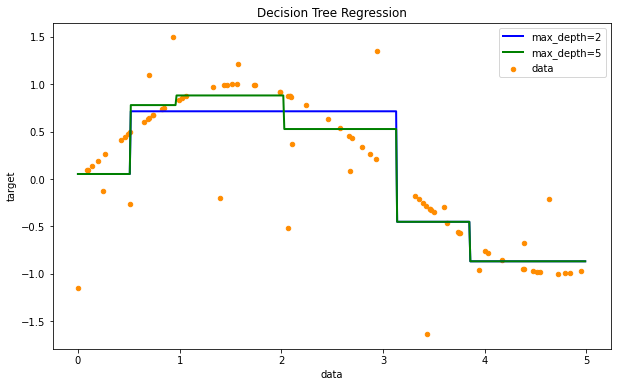

In [59]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, s=20, c='darkorange',label='data')
plt.plot(X_test, y_1, color='blue', label='max_depth=2', linewidth=2)
plt.plot(X_test, y_2, color='green', label='max_depth=5', linewidth=2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

The model of decision tree regressor with max_depth=5 is perform better than before because we input the hyperparameter to regulerize the data.

# IBM HR Analytics Employee Attrition & Performance Using Decision Tree
Now we will move into the project

In [60]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

I will look into some data information for exploratory

In [61]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [66]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


We will divide columns between categorical and numerical columns

In [68]:
num_cols = list(df.describe().columns)
cat_cols = list(set(df.columns).difference(num_cols))
removed = ['EmployeeCount', 'EmployeeNumber', 'StandardHours']
num_cols = [col for col in num_cols if col not in removed]

In [71]:
print("Total Column \t\t: \t{}".format(len(df.columns)))
print("Categorical Column \t: \t{}".format(len(cat_cols)))
print("Numerical Column \t: \t{}".format(len(num_cols)))

Total Column 		: 	35
Categorical Column 	: 	9
Numerical Column 	: 	23


Lets look at the correlation between features

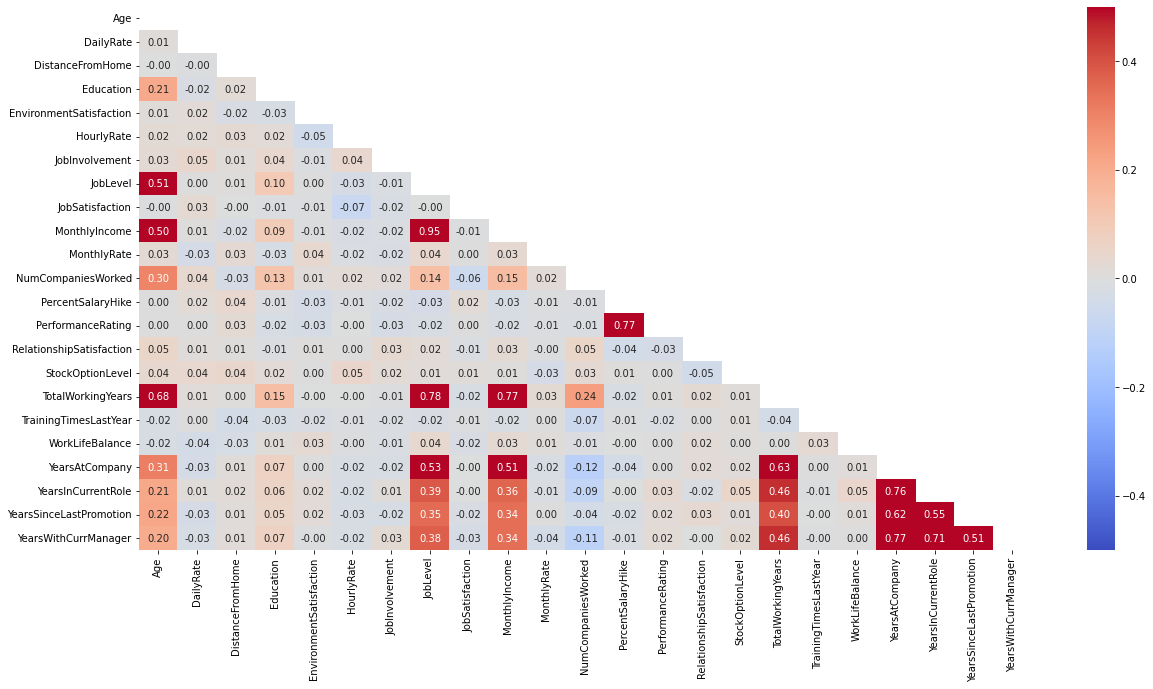

In [83]:
plt.figure(figsize=(20,10))
mask = np.zeros_like(df[num_cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[num_cols].corr(), mask=mask, annot=True, fmt='.2f', center = 0, vmax=0.5, vmin=-0.5,
            cmap = sns.color_palette("coolwarm", as_cmap=True))
plt.show()

Change attrition column to binary

In [85]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [86]:
attrition_to_binary = {'Yes': 0, 'No': 1}
df['Attrition'] = df['Attrition'].map(attrition_to_binary)

In [87]:
cat_cols.remove('Attrition')

Change other categorical columns using pandas get dummies

In [88]:
df_cat = pd.get_dummies(df[cat_cols])

Define X and y

In [89]:
X = pd.concat([df[num_cols], df_cat], axis=1)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Over18_Y,Gender_Female,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,OverTime_No,OverTime_Yes,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [91]:
y = df['Attrition']

Define the model

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Create Result Report

In [119]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)
  if train:
    yhat = clf.predict(X_train)
    print('Training Result:\n')
    print('Accuracy Score \t\t: {0:.4f}\n'.format(accuracy_score(y_train,yhat)))
    print('Classification Report \t: \n{}\n'.format(classification_report(y_train,yhat)))
    print('Confusion Matrix \t: \n{}\n'.format(confusion_matrix(y_train,yhat)))
    print('ROC AUC Score \t\t: {0:.4f}'.format(roc_auc_score(lb.transform(y_train),lb.transform(yhat))))
  elif train == False:
    yhat = clf.predict(X_test)
    print('Testing Result:\n')
    print('Accuracy Score \t\t: {0:.4f}\n'.format(accuracy_score(y_test,yhat)))
    print('Classification Report \t: \n{}\n'.format(classification_report(y_test,yhat)))
    print('Confusion Matrix \t: \n{}\n'.format(confusion_matrix(y_test,yhat)))
    print('ROC AUC Score \t\t: {0:.4f}'.format(roc_auc_score(lb.transform(y_test),lb.transform(yhat))))


In [120]:
print_score(clf, X_train, X_test, y_train, y_test, train=True)

Training Result:

Accuracy Score 		: 1.0000

Classification Report 	: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176


Confusion Matrix 	: 
[[190   0]
 [  0 986]]

ROC AUC Score 		: 1.0000


In [121]:
print_score(clf, X_train, X_test, y_train, y_test, train=False)

Testing Result:

Accuracy Score 		: 0.7857

Classification Report 	: 
              precision    recall  f1-score   support

           0       0.33      0.34      0.34        47
           1       0.87      0.87      0.87       247

    accuracy                           0.79       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.79      0.79      0.79       294


Confusion Matrix 	: 
[[ 16  31]
 [ 32 215]]

ROC AUC Score 		: 0.6054
